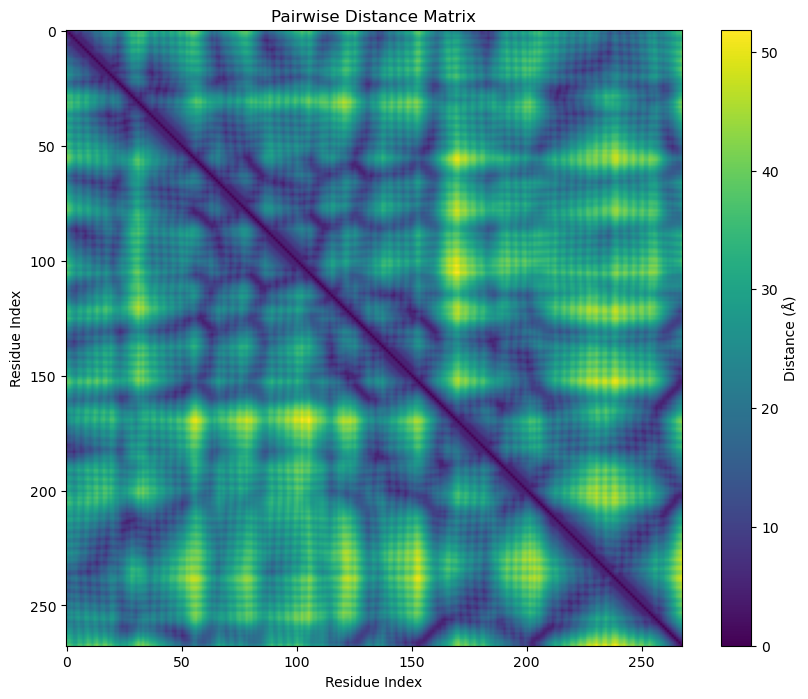

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import *

def get_coordinates(pdb_file):
    parser = PDBParser()
    structure = parser.get_structure('protein', pdb_file)
    coordinates = []
    
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    if atom.get_name() == 'CA':  # Only consider alpha carbons
                        coordinates.append(atom.get_coord())
    
    return np.array(coordinates)

def calculate_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = np.linalg.norm(coordinates[i] - coordinates[j])
    
    return distance_matrix

# Get coordinates from PDB file
coordinates = get_coordinates("../T1025_ESM.pdb")

# Calculate distance matrix
distance_matrix = calculate_distance_matrix(coordinates)

# Plot the distance matrix
plt.figure(figsize=(10, 8))
plt.imshow(distance_matrix, cmap='viridis')
plt.colorbar(label='Distance (Å)')
plt.title('Pairwise Distance Matrix')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.show()


/opt/anaconda3/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3833
  warnings.warn(


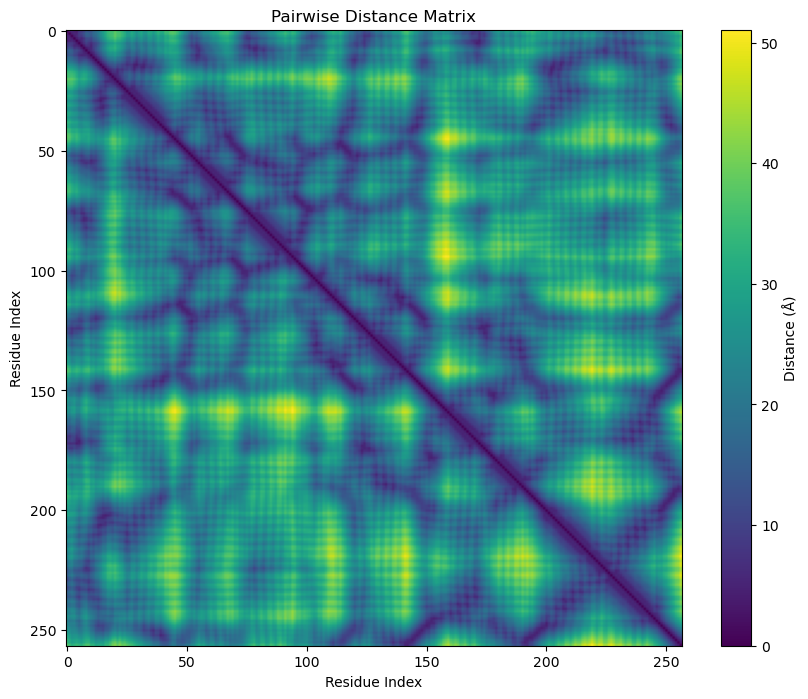

In [3]:
# Get coordinates from PDB file
coordinates_org = get_coordinates("../casp14_targets/T1025.pdb")

# Calculate distance matrix
distance_matrix_org = calculate_distance_matrix(coordinates)

# Plot the distance matrix
plt.figure(figsize=(10, 8))
plt.imshow(distance_matrix_org, cmap='viridis')
plt.colorbar(label='Distance (Å)')
plt.title('Pairwise Distance Matrix')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.show()

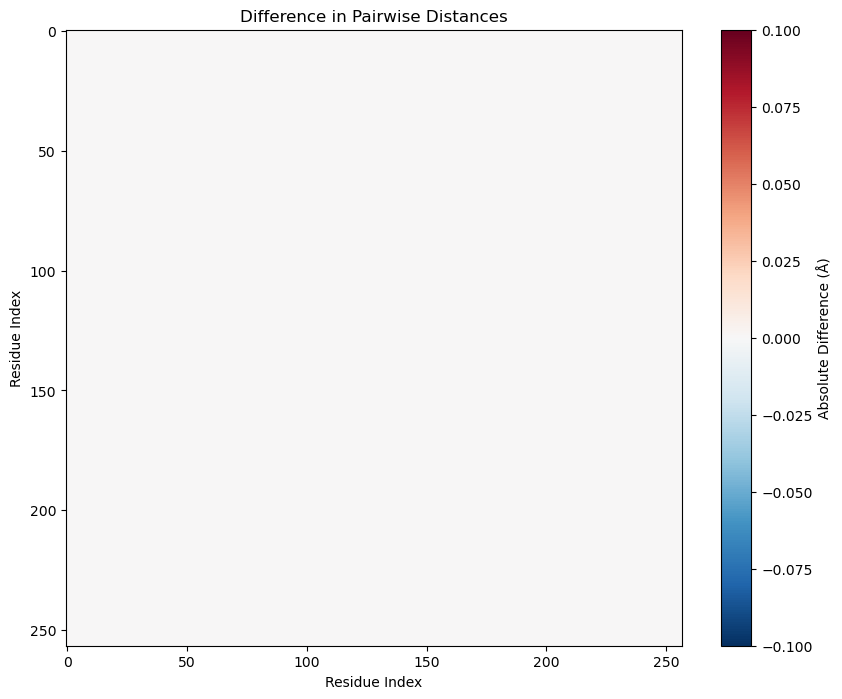

Mean absolute difference: 0.0 Å
Maximum absolute difference: 0.0 Å
L2 norm: 0.0 Å


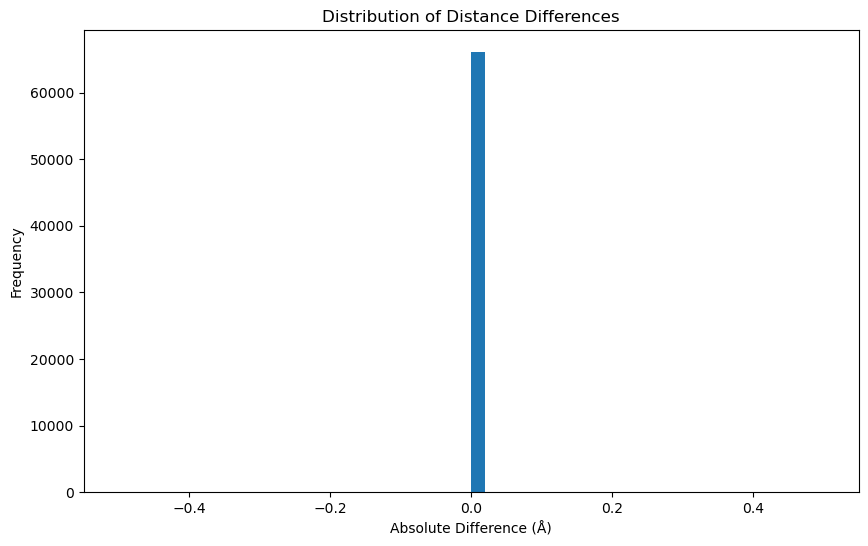

In [5]:
# Calculate the difference between the two distance matrices
difference_matrix = np.abs(distance_matrix - distance_matrix_org)
l2_norm = np.sqrt(np.sum(difference_matrix**2))

# Plot the difference matrix
plt.figure(figsize=(10, 8))
plt.imshow(difference_matrix, cmap='RdBu_r')
plt.colorbar(label='Absolute Difference (Å)')
plt.title('Difference in Pairwise Distances')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.show()

# Calculate and print some statistics
mean_diff = np.mean(difference_matrix)
max_diff = np.max(difference_matrix)
print(f"Mean absolute difference: {mean_diff} Å")
print(f"Maximum absolute difference: {max_diff} Å")
print(f"L2 norm: {l2_norm} Å")

# Plot histogram of differences
plt.figure(figsize=(10, 6))
plt.hist(difference_matrix.flatten(), bins=50)
plt.xlabel('Absolute Difference (Å)')
plt.ylabel('Frequency')
plt.title('Distribution of Distance Differences')
plt.show()
